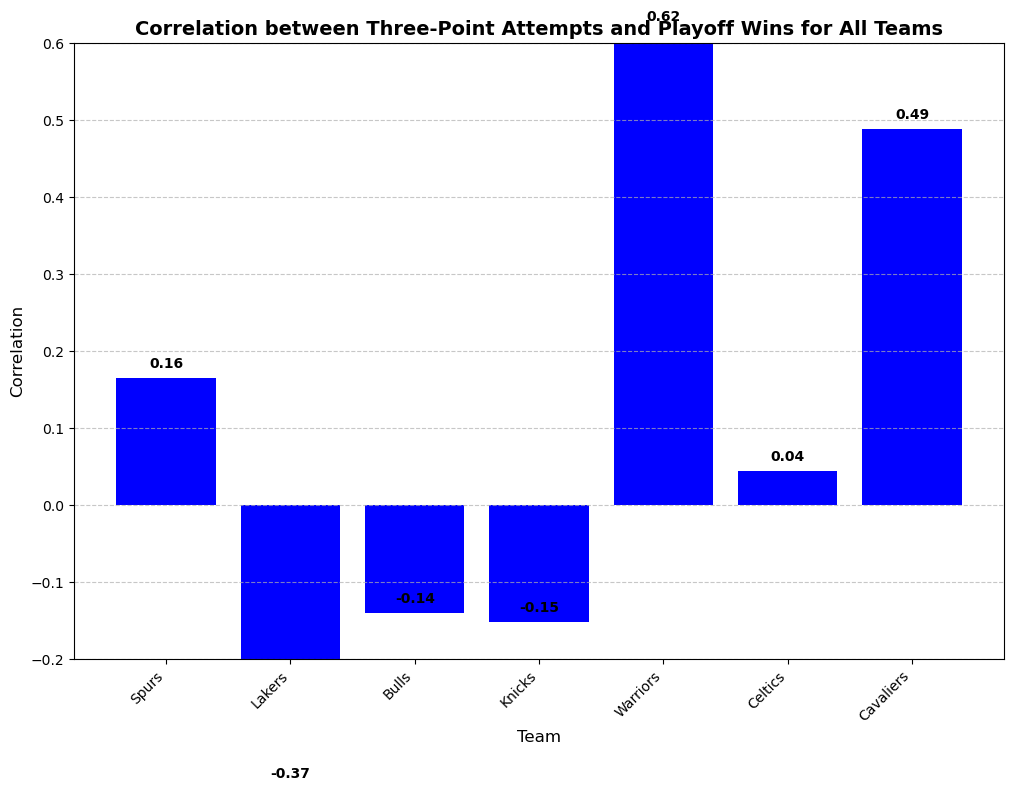

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import teamyearbyyearstats

# Function to retrieve and process team statistics
def get_team_stats(team_id):
    # Retrieve team year-by-year statistics
    team_stats = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id)
    # Get the data frame containing the team statistics
    team_stats_df = team_stats.get_data_frames()[0]

    # Filter the relevant columns for three-point attempts made (FG3A), made (FG3M), and percentage (FG3_PCT)
    team_three_point_attempts_made = team_stats_df['FG3A']
    team_three_point_made = team_stats_df['FG3M']
    team_three_point_percentage = team_stats_df['FG3_PCT']

    # Combine the relevant columns into a new dataframe
    team_three_point_stats_df = pd.DataFrame({
        'Year': team_stats_df['YEAR'],
        'Three-Point Attempts': team_three_point_attempts_made,
        'Three-Point Made': team_three_point_made,
        'Three-Point Percentage': team_three_point_percentage,
        'PO_WINS': team_stats_df['PO_WINS']  # Adding the 'PO_WINS' column
    })

    # Convert the 'Year' column to integers representing the starting year of the season
    team_three_point_stats_df['Year'] = team_three_point_stats_df['Year'].str[:4].astype(int)

    # Filter the dataframe to show years after 1979
    team_three_point_stats_df = team_three_point_stats_df[team_three_point_stats_df['Year'] >= 1979]

    # Calculate regular season win percentage (WINS / (WINS + LOSSES)) and add it to the dataframe
    team_three_point_stats_df['Wins'] = team_stats_df['WINS']
    team_three_point_stats_df['Losses'] = team_stats_df['LOSSES']
    team_three_point_stats_df['Win Percentage'] = team_three_point_stats_df['Wins'] / (team_three_point_stats_df['Wins'] + team_three_point_stats_df['Losses'])

    # Drop the 'Wins' and 'Losses' columns as they are no longer needed in the final dataframe
    team_three_point_stats_df.drop(columns=['Wins', 'Losses'], inplace=True)

    return team_three_point_stats_df

# List of team IDs for the specified teams
team_ids = [1610612759, 1610612747, 1610612741, 1610612752, 1610612744, 1610612738, 1610612739]  
# Spurs, Lakers, Bulls, Knicks, Warriors, Celtics, Cavaliers

# Create an empty dictionary to store dataframes for each team
team_dataframes = {}

# Loop through each team ID and retrieve the team statistics
for team_id in team_ids:
    team_name = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id).get_data_frames()[0]['TEAM_NAME'][0]
    team_df = get_team_stats(team_id)
    team_dataframes[team_name] = team_df

# Create a bar chart for the correlation between Three-Point Attempts and Playoff Wins for all teams
plt.figure(figsize=(12, 8))
for team_name, team_df in team_dataframes.items():
    correlation_three_point_attempts_playoffs = team_df['Three-Point Attempts'].corr(team_df['PO_WINS'])
    plt.bar(team_name, correlation_three_point_attempts_playoffs, color='blue')
    plt.text(team_name, correlation_three_point_attempts_playoffs + 0.01, f'{correlation_three_point_attempts_playoffs:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xlabel('Team', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation between Three-Point Attempts and Playoff Wins for All Teams', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(-0.2, 0.6)  # Adjust the y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)


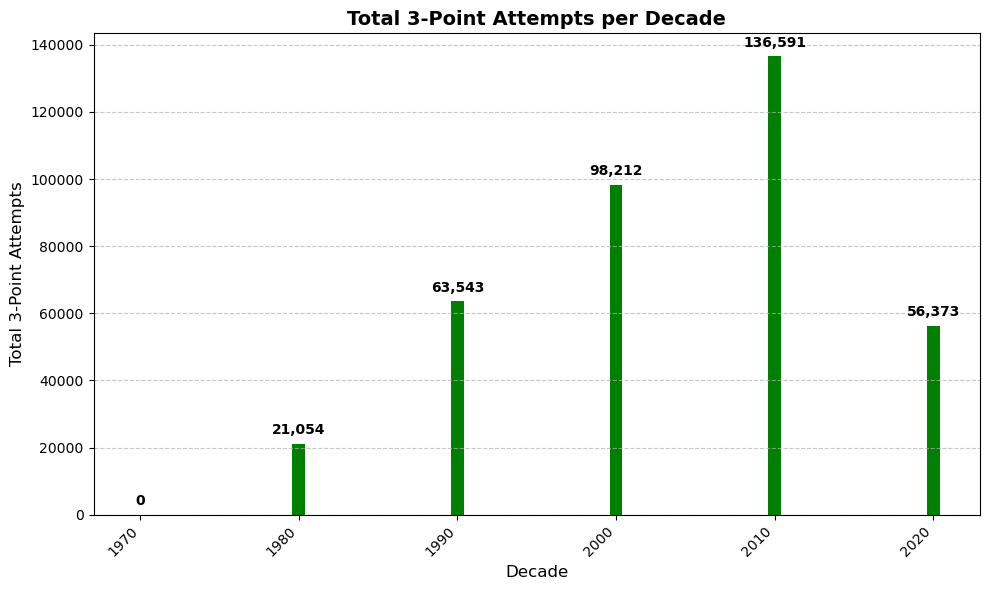

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import teamyearbyyearstats

# Function to retrieve and process team statistics
def get_team_stats(team_id):
    # Retrieve team year-by-year statistics
    team_stats = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id)
    # Get the data frame containing the team statistics
    team_stats_df = team_stats.get_data_frames()[0]

    # Filter the relevant columns for three-point attempts made (FG3A), made (FG3M), and percentage (FG3_PCT)
    team_three_point_attempts_made = team_stats_df['FG3A']
    team_three_point_made = team_stats_df['FG3M']
    team_three_point_percentage = team_stats_df['FG3_PCT']
    
     # Combine the relevant columns into a new dataframe
    team_three_point_stats_df = pd.DataFrame({
        'Year': team_stats_df['YEAR'],
        'Three-Point Attempts': team_three_point_attempts_made,
        'Three-Point Made': team_three_point_made,
        'Three-Point Percentage': team_three_point_percentage,
        'PO_WINS': team_stats_df['PO_WINS']  # Adding the 'PO_WINS' column
    })

    # Convert the 'Year' column to integers representing the starting year of the season
    team_three_point_stats_df['Year'] = team_three_point_stats_df['Year'].str[:4].astype(int)

    # Filter the dataframe to show years after 1979
    team_three_point_stats_df = team_three_point_stats_df[team_three_point_stats_df['Year'] >= 1979]

    # Calculate regular season win percentage (WINS / (WINS + LOSSES)) and add it to the dataframe
    team_three_point_stats_df['Wins'] = team_stats_df['WINS']
    team_three_point_stats_df['Losses'] = team_stats_df['LOSSES']
    team_three_point_stats_df['Win Percentage'] = team_three_point_stats_df['Wins'] / (team_three_point_stats_df['Wins'] + team_three_point_stats_df['Losses'])

    # Drop the 'Wins' and 'Losses' columns as they are no longer needed in the final dataframe
    team_three_point_stats_df.drop(columns=['Wins', 'Losses'], inplace=True)

    return team_three_point_stats_df

# List of team IDs for the specified teams
team_ids = [1610612759, 1610612747, 1610612741, 1610612752, 1610612744, 1610612738, 1610612739]  
# Spurs, Lakers, Bulls, Knicks, Warriors, Celtics, Cavaliers

# Create an empty dictionary to store dataframes for each team
team_dataframes = {}

# Loop through each team ID and retrieve the team statistics
for team_id in team_ids:
    team_name = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id).get_data_frames()[0]['TEAM_NAME'][0]
    team_df = get_team_stats(team_id)
    team_dataframes[team_name] = team_df


# Combine all team dataframes into a single dataframe
all_teams_df = pd.concat(team_dataframes.values(), ignore_index=True)

# Extract the year and three-point attempts columns from the dataframe
year_column = all_teams_df['Year']
three_point_attempts_column = all_teams_df['Three-Point Attempts']

# Create a new column 'Decade' to represent the decade for each year
all_teams_df['Decade'] = (year_column // 10) * 10

# Group the data by 'Decade' and sum the 'Three-Point Attempts' for each decade
decade_grouped_df = all_teams_df.groupby('Decade')['Three-Point Attempts'].sum().reset_index()

# Create the bar chart for total 3-Point Attempts per Decade
plt.figure(figsize=(10, 6))
plt.bar(decade_grouped_df['Decade'], decade_grouped_df['Three-Point Attempts'], color='green')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Total 3-Point Attempts', fontsize=12)
plt.title('Total 3-Point Attempts per Decade', fontsize=14, fontweight='bold')
plt.xticks(decade_grouped_df['Decade'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to each bar showing the total attempts
for i, value in enumerate(decade_grouped_df['Three-Point Attempts']):
    plt.text(decade_grouped_df['Decade'][i], value + 2000, f'{value:,}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()  # Improve spacing
plt.show()


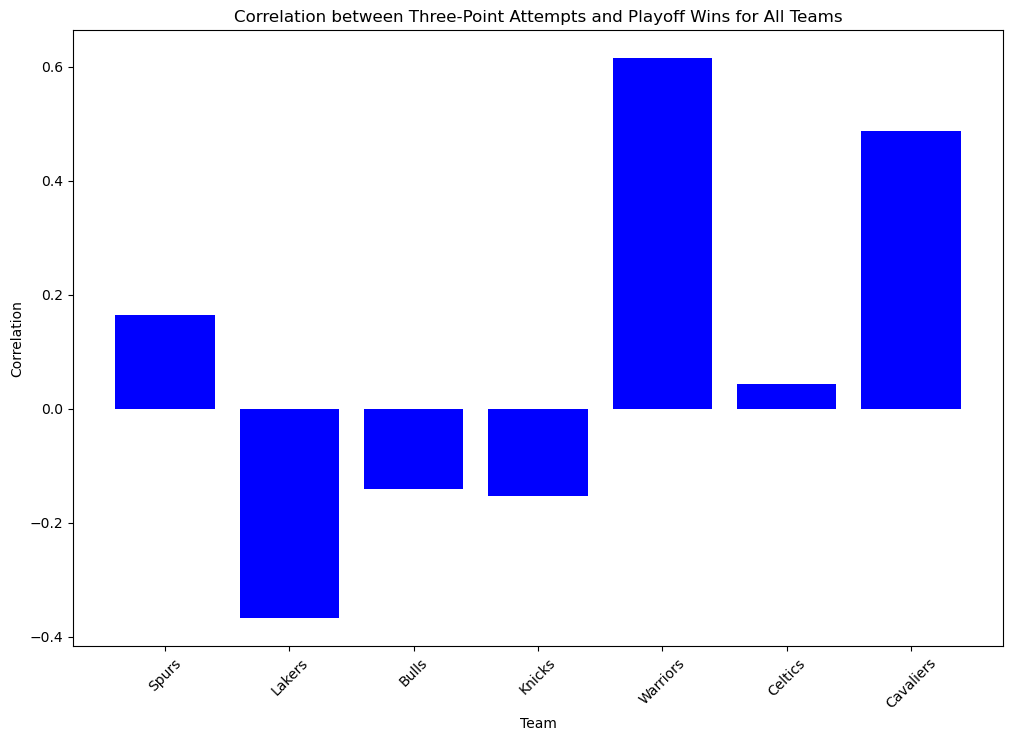

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import teamyearbyyearstats

# Function to retrieve and process team statistics
def get_team_stats(team_id):
    # Retrieve team year-by-year statistics
    team_stats = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id)
    # Get the data frame containing the team statistics
    team_stats_df = team_stats.get_data_frames()[0]

    # Filter the relevant columns for three-point attempts made (FG3A), made (FG3M), and percentage (FG3_PCT)
    team_three_point_attempts_made = team_stats_df['FG3A']
    team_three_point_made = team_stats_df['FG3M']
    team_three_point_percentage = team_stats_df['FG3_PCT']

    # Combine the relevant columns into a new dataframe
    team_three_point_stats_df = pd.DataFrame({
        'Year': team_stats_df['YEAR'],
        'Three-Point Attempts': team_three_point_attempts_made,
        'Three-Point Made': team_three_point_made,
        'Three-Point Percentage': team_three_point_percentage,
        'PO_WINS': team_stats_df['PO_WINS']  # Adding the 'PO_WINS' column
    })

    # Convert the 'Year' column to integers representing the starting year of the season
    team_three_point_stats_df['Year'] = team_three_point_stats_df['Year'].str[:4].astype(int)

    # Filter the dataframe to show years after 1979
    team_three_point_stats_df = team_three_point_stats_df[team_three_point_stats_df['Year'] >= 1979]

    # Calculate regular season win percentage (WINS / (WINS + LOSSES)) and add it to the dataframe
    team_three_point_stats_df['Wins'] = team_stats_df['WINS']
    team_three_point_stats_df['Losses'] = team_stats_df['LOSSES']
    team_three_point_stats_df['Win Percentage'] = team_three_point_stats_df['Wins'] / (team_three_point_stats_df['Wins'] + team_three_point_stats_df['Losses'])

    # Drop the 'Wins' and 'Losses' columns as they are no longer needed in the final dataframe
    team_three_point_stats_df.drop(columns=['Wins', 'Losses'], inplace=True)

    return team_three_point_stats_df

# List of team IDs for the specified teams
team_ids = [1610612759, 1610612747, 1610612741, 1610612752, 1610612744, 1610612738, 1610612739]  
# Spurs, Lakers, Bulls, Knicks, Warriors, Celtics, Cavaliers

# Create an empty dictionary to store dataframes for each team
team_dataframes = {}

# Loop through each team ID and retrieve the team statistics
for team_id in team_ids:
    team_name = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id).get_data_frames()[0]['TEAM_NAME'][0]
    team_df = get_team_stats(team_id)
    team_dataframes[team_name] = team_df

# Create a bar chart for the correlation between Three-Point Attempts and Playoff Wins for all teams
plt.figure(figsize=(12, 8))
for team_name, team_df in team_dataframes.items():
    correlation_three_point_attempts_playoffs = team_df['Three-Point Attempts'].corr(team_df['PO_WINS'])
    plt.bar(team_name, correlation_three_point_attempts_playoffs, color='blue')

plt.xlabel('Team')
plt.ylabel('Correlation')
plt.title('Correlation between Three-Point Attempts and Playoff Wins for All Teams')
plt.xticks(rotation=45)
plt.show()

# Combine all team dataframes into a single dataframe
all_teams_df = pd.concat(team_dataframes.values(), ignore_index=True)